In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
CD=pd.read_csv("D:\\ExcelR Assignments\\Decision Trees\\Company_Data.csv")
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data=pd.get_dummies(CD,columns=['ShelveLoc','Urban','US'])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [5]:
data['Sales_eff']=data.Sales.map(lambda x: 'High' if x>8 else 'Low')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_eff
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Low
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [6]:
columns=[
'CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']

In [7]:
X=data[columns]
Y=data['Sales_eff']

In [8]:
X

,CompPrice,Income,Advertising,Population,Price,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,17,1,0,0,0,1,0,1
1,111,48,16,260,83,10,0,1,0,0,1,0,1
2,113,35,10,269,80,12,0,0,1,0,1,0,1
3,117,100,4,466,97,14,0,0,1,0,1,0,1
4,141,64,3,340,128,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,14,0,1,0,0,1,0,1
396,139,23,3,37,120,11,0,0,1,1,0,0,1
397,162,26,12,368,159,18,0,0,1,0,1,0,1
398,100,79,7,284,95,12,1,0,0,0,1,0,1


In [9]:
Y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_eff, Length: 400, dtype: object

In [11]:
Y.value_counts()

Low     236
High    164
Name: Sales_eff, dtype: int64

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
X_train

,CompPrice,Income,Advertising,Population,Price,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
336,138,35,6,60,143,18,1,0,0,0,1,1,0
64,100,67,12,184,104,16,0,0,1,1,0,0,1
55,143,81,5,60,154,18,0,0,1,0,1,0,1
106,102,33,0,217,139,18,0,0,1,1,0,1,0
300,116,78,1,158,99,11,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,12,0,0,1,0,1,0,1
192,108,26,0,408,93,14,0,0,1,1,0,1,0
117,145,53,0,507,119,12,0,0,1,0,1,1,0
47,126,98,0,173,108,16,1,0,0,0,1,1,0


In [14]:
X_test

,CompPrice,Income,Advertising,Population,Price,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
132,125,87,9,232,136,10,0,1,0,0,1,0,1
309,131,111,13,33,80,18,1,0,0,0,1,0,1
341,98,120,0,268,93,10,0,0,1,1,0,1,0
196,130,28,6,410,133,16,1,0,0,0,1,0,1
246,120,56,20,266,90,18,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,107,117,11,148,118,18,0,1,0,0,1,0,1
363,111,75,1,377,108,12,0,1,0,0,1,1,0
304,123,98,12,408,134,10,0,1,0,0,1,0,1
361,131,25,10,183,104,15,0,0,1,1,0,0,1


In [15]:
Y_train

336     Low
64      Low
55      Low
106     Low
300    High
       ... 
323    High
192     Low
117    High
47      Low
172    High
Name: Sales_eff, Length: 320, dtype: object

In [16]:
Y_test

132    High
309    High
341     Low
196     Low
246     Low
       ... 
14     High
363    High
304    High
361    High
329    High
Name: Sales_eff, Length: 80, dtype: object

In [17]:
Y_test.value_counts()

Low     43
High    37
Name: Sales_eff, dtype: int64

In [18]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

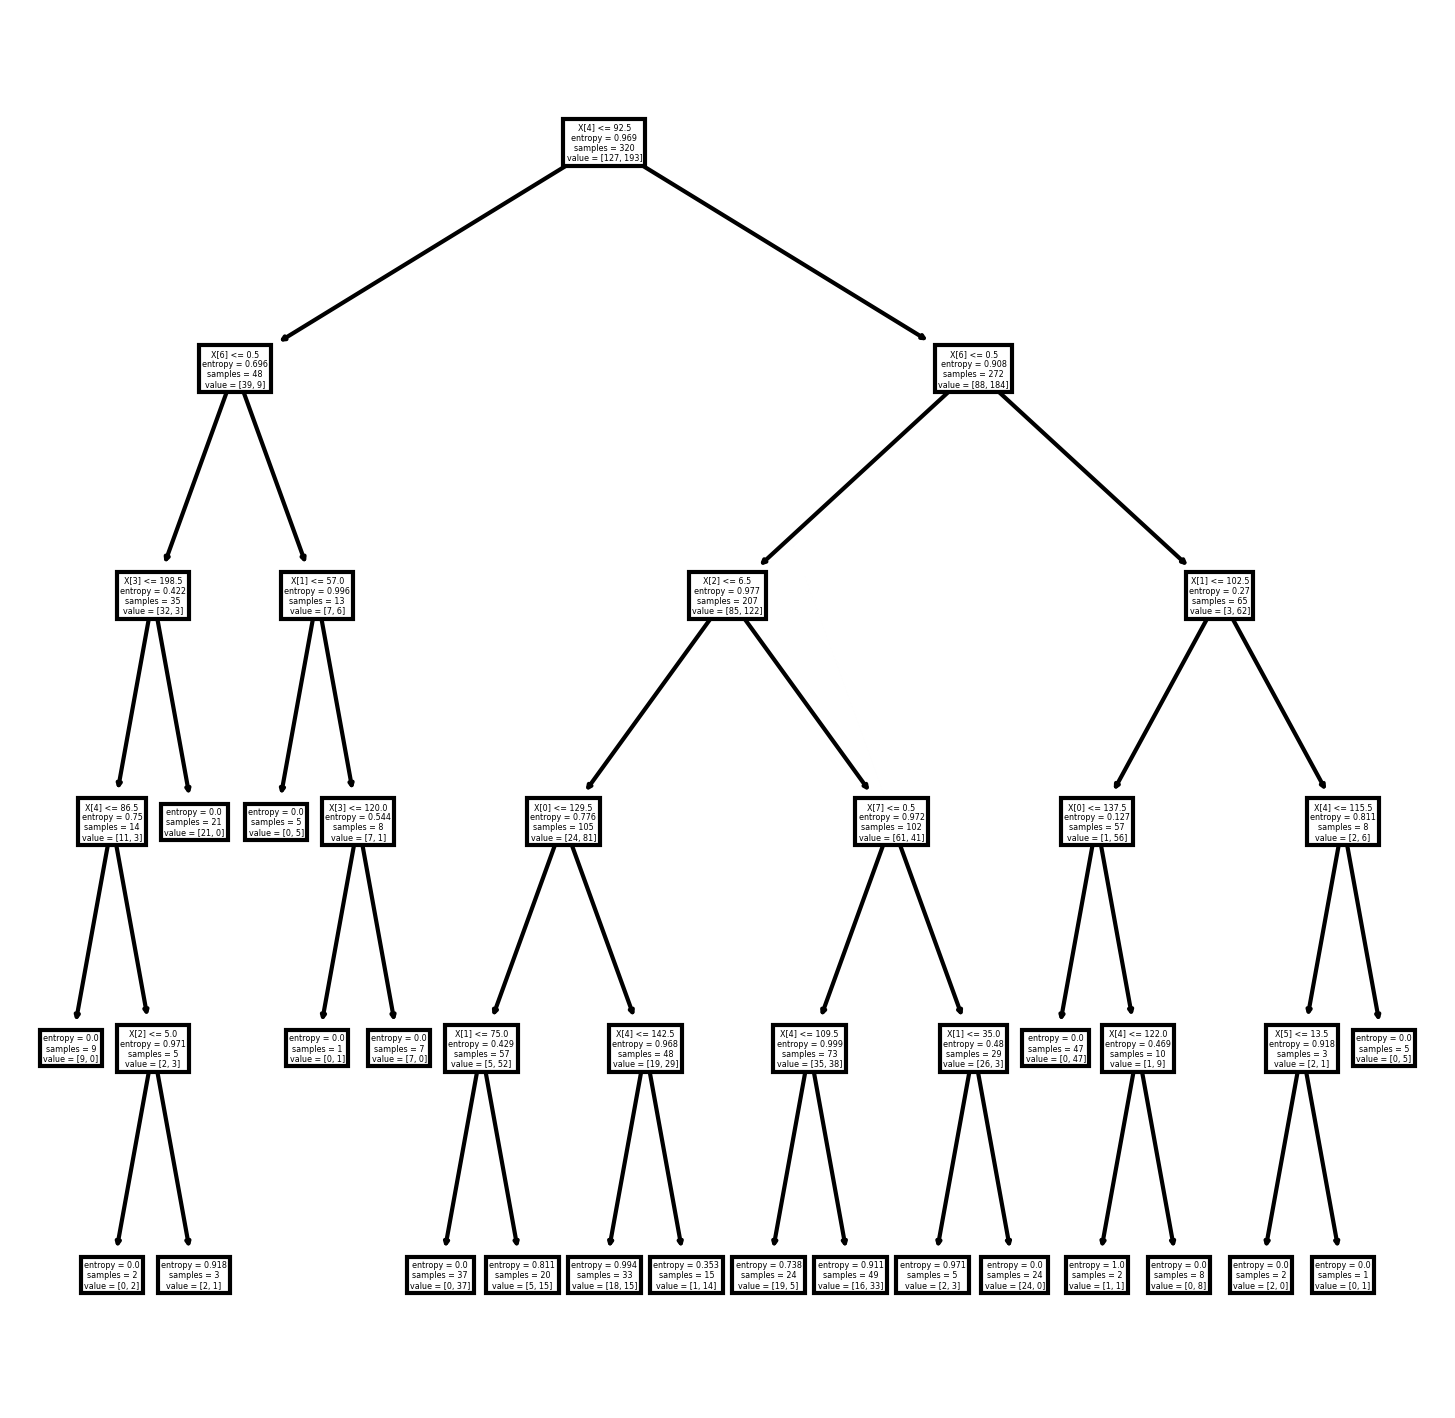

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model);

In [24]:
preds=model.predict(X_test)
pd.Series(preds).value_counts()

Low     44
High    36
dtype: int64

In [25]:
pd.crosstab(Y_test,preds)

col_0,High,Low
Sales_eff,,
High,26,11
Low,10,33


In [26]:
np.mean(preds==Y_test)

0.7375

In [27]:
model.score(X_train,Y_train)

0.85625

In [31]:
print("Accuracy",np.mean(preds==Y_test)*100)

Accuracy 73.75


# Building Decision Tree Classifier using Gini Criteria

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [33]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
preds=model_gini.predict(X_test)
print("Accuracy",np.mean(preds==Y_test)*100)

Accuracy 76.25
